In [1]:
import h5py, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import sys, os


In [3]:
# Setting the path where lcls-tools is
# You will need to make sure LCLS_TOOLS is defined in your env (top level)
# or define in python like this: 
# %env LCLS_TOOLS=/Users/nneveu/github/lcls-tools/
LPATH = os.getenv('LCLS_TOOLS')
sys.path.append(LPATH+'lcls_tools/image_processing')
from mat_image import MatImage as MI

env: LCLS_TOOLS=/Users/nneveu/github/lcls-tools/


# VCC image 

0 ./ProfMon-CAMR_IN20_186-2020-07-09-022408.mat
1 ./ProfMon-CAMR_IN20_186-2020-06-21-071336.mat
2 ./ProfMon-CAMR_IN20_186-2020-06-21-085125.mat
3 ./ProfMon-CAMR_IN20_186-2020-06-22-075036.mat


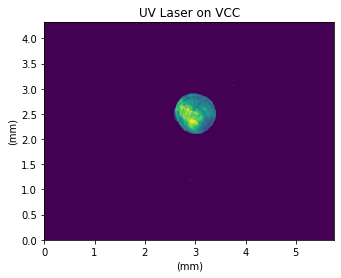

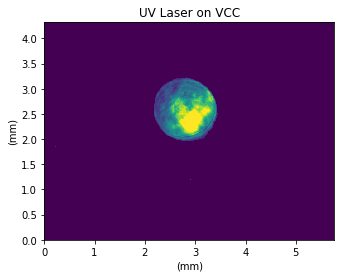

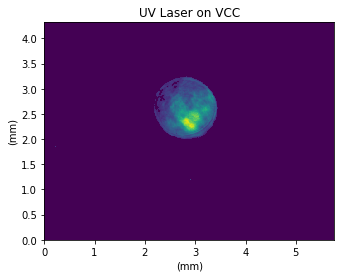

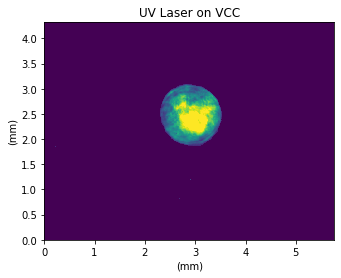

In [20]:
vcc_files = glob.glob('./ProfMon*.mat')
for i, filename in enumerate(vcc_files):   
    print(i, filename)
    vccimage = MI()
    vccimage.load_mat_image(filename)
    resolution = vccimage.resolution
    cols = vccimage.columns
    rows = vccimage.rows
    xdim = cols*resolution*10**-3
    ydim = rows*resolution*10**-3

    plt.figure()
    plt.title('UV Laser on VCC')
    plt.xlabel('(mm)')
    plt.ylabel('(mm)')
    plt.imshow(vccimage._image_object.image, aspect='equal',extent=[0,xdim,0,ydim])
    #Save images to pdf for later inspection
    #plt.savefig('vcc_'+filename.split('/')[-1]+'.pdf', dpi=800, bbox_inches='tight')

### To make your distgen txt file: 

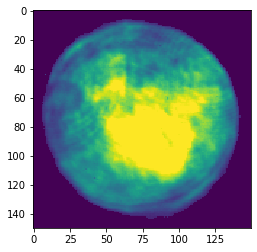

In [21]:
#Using last image above, trim background
cut_array = vccimage._image_object.image[130:280, 250:400]
plt.imshow(cut_array, aspect='equal')

# Save cut image to a txt file,
#np.savetxt('test.txt', cut_array)

#Add header (w/o pound symbol) to txt file:
#x   1.0000000e+00   0.0000000e+00 [mm]
#y   1.0000000e+00   0.0000000e+00 [mm]


# Make distgen files

In [9]:
import yaml
from distgen.generator import Generator
from distgen.plot import plot_dist2d, plot_dist1d, plot_current_profile
from distgen.physical_constants import unit_registry
from distgen.tools import read_2d_file

<disgten.Generator with input: 
n_particle: 250000
random_type: hammersley
start:
  MTE:
    units: meV
    value: 330
  type: cathode
t_dist:
  avg_t:
    units: ps
    value: 0
  n_sigma_cutoff: 3
  sigma_t:
    units: ps
    value: 1.7
  type: gaussian
total_charge:
  units: pC
  value: 250
xy_dist:
  file: test.txt
  type: file2d

>

YAML input:
xy_dist:
  file: test.txt
  type: file2d



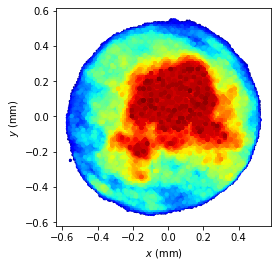

In [22]:
# Using the 3rd laser image above
gen=Generator('vcc.yaml',verbose=0)
print(gen)
beam = gen.beam()

print('\nYAML input:')
print(yaml.dump({'xy_dist':gen.input['xy_dist']}))

# X-Y Plot
units = {'x':'mm', 'y':'mm', 'z':'mm', 'px':'keV/c', 'py':'keV/c', 't':'ps', 'q':'pC', 'I':'A'}
plot_dist2d(beam, 'x', units['x'], 'y', units['y'], nbins=100, axis='equal');